In [1]:
import databroker

In [2]:
list(databroker.catalog)

['29idd', '29idd_retired_2021_12_01']

In [3]:


cat = databroker.catalog["29idd"]
len(cat)



204

In [4]:


from apstools.utils import *
listruns(num=9)



catalog: 29idd
   scan_id                 time plan_name         detectors
0      184  2021-12-05 19:33:44      scan  [scaler, D4calc]
1      183  2021-12-05 19:27:46      scan  [scaler, D4calc]
2      182  2021-12-05 19:18:15      scan  [scaler, D4calc]
3      181  2021-12-05 19:12:28  rel_scan          [scaler]
4      180  2021-12-05 19:10:33  rel_scan          [scaler]
5      179  2021-12-05 19:09:37  rel_scan          [scaler]
6      178  2021-12-05 19:07:48  rel_scan          [scaler]
7      177  2021-12-05 19:05:44  rel_scan          [scaler]
8      176  2021-12-05 19:04:22  rel_scan          [scaler]


In [5]:


run = cat[85]
run



BlueskyRun
  uid='ef3ffdd7-88da-4db7-8f11-08a26d2a11b5'
  exit_status='success'
  2021-12-03 12:54:45.736 -- 2021-12-03 12:58:51.463
  Streams:
    * primary
    * baseline


In [6]:
ds = run.primary.read()
ds



<xarray.Dataset>
Dimensions:                        (time: 188)
Coordinates:
  * time                           (time) float64 1.639e+09 ... 1.639e+09
Data variables: (12/18)
    kappa_motors_m9                (time) float64 2.0 2.1 2.2 ... 20.5 20.6 20.7
    kappa_motors_m9_user_setpoint  (time) float64 2.0 2.1 2.2 ... 20.5 20.6 20.7
    kappa_motors_m9_sync           (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    kappa_motors_m9_desc           (time) <U3 'tth' 'tth' 'tth' ... 'tth' 'tth'
    kappa_motors_m9_homf           (time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    kappa_motors_m9_dval           (time) float64 -2.0 -2.1 -2.2 ... -20.6 -20.7
    ...                             ...
    TEY                            (time) float64 5.256e+04 ... 4.148e+04
    D3                             (time) float64 9.0 10.0 10.0 ... 9.0 9.0 9.0
    D4                             (time) float64 3.301e+04 3.376e+04 ... 15.0
    MCP                            (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mesh                           (time) float64 2.103e+04 ... 2.094e+04
    scaler_time                    (time) float64 0.1 0.1 0.1 ... 0.1 0.1 0.1

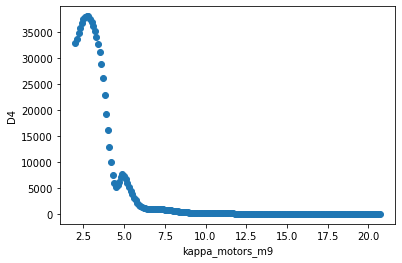

In [7]:
ds.plot.scatter("kappa_motors_m9", "D4")


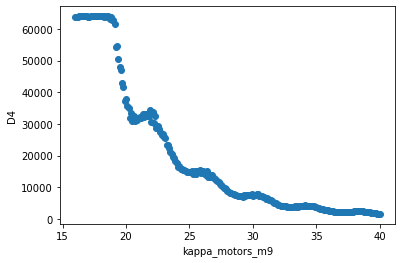

In [8]:
cat[86].primary.read().plot.scatter("kappa_motors_m9", "D4")

In [9]:


import csv
from xarray.core.dataset import Dataset as xarray_Dataset
from pandas import DataFrame as pandas_DataFrame

def export_run(run):
    "Save all the run information to text files."
    scan_id = run.metadata["start"]["scan_id"]

    def export_data(data, scan_id, label, prefix="run"):
        with open(f"{prefix}-{scan_id}-{label}.csv", "w", newline="\n") as f:
            if isinstance(data, dict):
                writer = csv.DictWriter(f, data.keys())
                writer.writeheader()
                writer.writerow(data)
            elif isinstance(data, xarray_Dataset):
                f.write(data.to_pandas().to_csv())
            elif isinstance(data, pandas_DataFrame):
                f.write(data.to_csv())
            print(f"wrote file: {f.name}")

    export_data(run.metadata, scan_id, "metadata")
    for stream_name in run:
        ds = getattr(run, stream_name).read()
        if stream_name == "baseline":
            ds = ds.to_pandas().transpose()
        export_data(ds, scan_id, stream_name)

export_run(run)



wrote file: run-85-metadata.csv
wrote file: run-85-primary.csv
wrote file: run-85-baseline.csv


In [18]:


def export_runs(scan_id_list, since=None, until=None):
    runs = cat
    # first by date since scan_id might not be unique for all times
    if since is not None:
        runs = runs.search(databroker.queries.TimeRange(since=since))
    if until is not None:
        runs = runs.search(databroker.queries.TimeRange(until=until))
    # now, search by scan_id (in the supplied list)
    runs = runs.search({'scan_id': {'$in': scan_id_list}})

    for uid in runs:
        export_run(runs[uid])

export_runs(list(range(70, 184+1)))



wrote file: run-184-metadata.csv
wrote file: run-184-primary.csv
wrote file: run-184-baseline.csv
wrote file: run-183-metadata.csv
wrote file: run-183-primary.csv
wrote file: run-183-baseline.csv
wrote file: run-182-metadata.csv
wrote file: run-182-primary.csv
wrote file: run-182-baseline.csv
wrote file: run-181-metadata.csv
wrote file: run-181-primary.csv
wrote file: run-181-baseline.csv
wrote file: run-180-metadata.csv
wrote file: run-180-primary.csv
wrote file: run-180-baseline.csv
wrote file: run-179-metadata.csv
wrote file: run-179-primary.csv
wrote file: run-179-baseline.csv
wrote file: run-178-metadata.csv
wrote file: run-178-primary.csv
wrote file: run-178-baseline.csv
wrote file: run-177-metadata.csv
wrote file: run-177-primary.csv
wrote file: run-177-baseline.csv
wrote file: run-176-metadata.csv
wrote file: run-176-primary.csv
wrote file: run-176-baseline.csv
wrote file: run-175-metadata.csv
wrote file: run-175-primary.csv
wrote file: run-175-baseline.csv
wrote file: run-174-

In [10]:


def export_runs(scan_id_list, since=None, until=None):
    runs = cat
    # first by date since scan_id might not be unique for all times
    if since is not None:
        runs = runs.search(databroker.queries.TimeRange(since=since))
    if until is not None:
        runs = runs.search(databroker.queries.TimeRange(until=until))
    # now, search by scan_id (in the supplied list)
    runs = runs.search({'scan_id': {'$in': scan_id_list}})

    for uid in runs:
        export_run(runs[uid])

#



In [ ]:
cd '/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/'

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks


In [ ]:
cd data_202112_run/

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/data_202112_run


In [ ]:
ls

run-202112/  run-20211203/  run-20211204/


In [29]:
cd run-20211203/  

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/data_202112_run/run-20211203


In [12]:
export_runs(list(range(89, 109+1)),until="2021-12-03 21:44")

wrote file: run-109-metadata.csv
wrote file: run-109-primary.csv
wrote file: run-109-baseline.csv
wrote file: run-108-metadata.csv
wrote file: run-108-primary.csv
wrote file: run-108-baseline.csv
wrote file: run-107-metadata.csv
wrote file: run-107-primary.csv
wrote file: run-107-baseline.csv
wrote file: run-106-metadata.csv
wrote file: run-106-primary.csv
wrote file: run-106-baseline.csv
wrote file: run-105-metadata.csv
wrote file: run-105-primary.csv
wrote file: run-105-baseline.csv
wrote file: run-104-metadata.csv
wrote file: run-104-primary.csv
wrote file: run-104-baseline.csv
wrote file: run-103-metadata.csv
wrote file: run-103-primary.csv
wrote file: run-103-baseline.csv
wrote file: run-102-metadata.csv
wrote file: run-102-primary.csv
wrote file: run-102-baseline.csv
wrote file: run-101-metadata.csv
wrote file: run-101-primary.csv
wrote file: run-101-baseline.csv
wrote file: run-100-metadata.csv
wrote file: run-100-primary.csv
wrote file: run-100-baseline.csv
wrote file: run-99-m

In [19]:
cd '/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/'

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks


In [21]:
cd data_202112_run/

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/data_202112_run


In [22]:
ls

run-202112/  run-20211203/  run-20211204/


In [23]:
cd run-20211204/  

/home/beams3/RODOLAKIS/src/bluesky_29id/notebooks/data_202112_run/run-20211204


In [15]:
export_runs(list(range(90, 109+1)),since="2021-12-03 21:44")

wrote file: run-109-metadata.csv
wrote file: run-109-primary.csv
wrote file: run-109-baseline.csv
wrote file: run-108-metadata.csv
wrote file: run-108-primary.csv
wrote file: run-108-baseline.csv
wrote file: run-107-metadata.csv
wrote file: run-107-primary.csv
wrote file: run-107-baseline.csv
wrote file: run-106-metadata.csv
wrote file: run-106-primary.csv
wrote file: run-106-baseline.csv
wrote file: run-105-metadata.csv
wrote file: run-105-primary.csv
wrote file: run-105-baseline.csv
wrote file: run-104-metadata.csv
wrote file: run-104-primary.csv
wrote file: run-104-baseline.csv
wrote file: run-103-metadata.csv
wrote file: run-103-primary.csv
wrote file: run-103-baseline.csv
wrote file: run-102-metadata.csv
wrote file: run-102-primary.csv
wrote file: run-102-baseline.csv
wrote file: run-101-metadata.csv
wrote file: run-101-primary.csv
wrote file: run-101-baseline.csv
wrote file: run-100-metadata.csv
wrote file: run-100-primary.csv
wrote file: run-100-baseline.csv
wrote file: run-99-m

In [ ]:
Transient Scan ID: 109 Time: 2021-12-03 20:36:54
Transient Scan ID: 90     Time: 2021-12-03 21:44:56
Transient Scan ID: 110     Time: 2021-12-04 17:55:07